<h1><center>Data Visualization Using Python 1 </center></h1>

<h3><center> By </center></h3>
<h3><center>Danush Mody</center></h3>
<h3><center>Yogendra Mummaneni</center></h3>

**This section contains only import statements**

In [1]:
import os
import urllib.request
import csv
import pandas as pd

## Task 1: Identify one or more suitable web APIs

**In this assignment we are collecting earthquake data all over the world for last 5 years (from 2014 to 2018).**

***API Chosen:***
-  For the purpose of this assignment we have decided to choose a single API provided by: (https://earthquake.usgs.gov)

-  This API provides all the earthquakes occured worldwide.

-  USGS provides a single API with the ability to modify it using parameters provided in the documentation to suit the needs of the user. The documentation of the API can be found here: (https://earthquake.usgs.gov/fdsnws/event/1/)

-  This API does not require any form of API key and can be accessed freely by anyone at anytime.

-   The API returns maximum 20000 events, we observed few months have more then 20000 events. So we are collecting data for **15** days at once. 


In [2]:
#Sample URL for the API:
sample_url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=2010-01-01&endtime=2010-01-02"

### Task 2: Data Collection:
The API used allows for data to fetched in multiple formats some of them are listed below.
Data formats:
- CSV
- JSON
- XML
- Text
- KML

However, the JSON format has some discrepancies which causes failures in the code and parsing of the data.
To solve this issue we chose to have our data in the CSV format.

To do this, we use the parameter "*format=csv*" in the API URL.

The data collection process is broken down into four functions.
Each function can be thought of as a step in the data collection process.

**create_file_with_headings()**: This function was deemed necessary as we collect data in CSV, each call to the API generates CSV data with a row of headings and to avoid adding these multiple heading rows to our collated data, we skip the headings row while writing raw data to the file. The purpose of this function is to create a blank file with only the headings present.

**formulate_url()**: As the URL for the API call requires a series of parameters such as the start and the end dates for the data that we wish to collect, we need to ensure that the dates provided are correct and all situations such as leap years are accounted for. As we are collecting data for a number of years, multiple calls need to be made which is done with this function. **The data is collected for every 15 days.** It also makes a call to the **data_reader_writer()** function which is described next.

**data_reader_writer()**: Once the URL is ready, it is passed to this function which deals with making the API calls as well as reading the data recieved from the call and writing it to the CSV file in the appropriate format. It is important to note that this function *appends* the data to the file with each new call.

**remove_blank_lines()**: Finally once the data is written to the file, we need to make sure that there is no empty lines between the data as this signifies a null row or a row with no data for the headings. To this end, this function strips all the blank or empty lines from the file.

In [3]:
def create_file_with_headings(file_name):
    """Since each call to the API adds a row of headings to the file, to avoid this
        we manually add a header row to the file.
    Args:
        file_name(str): Name of the file that will be created.
    """
    headings = ["time","latitude","longitude","depth","mag","magType","nst","gap","dmin","rms","net","id","updated","place","type","horizontalError","depthError","magError","magNst","status","locationSource","magSource"] 
    with open(file_name, "w",newline='') as write_file: 
        f = csv.writer(write_file)
        f.writerow(headings)
    write_file.close()
    
def formulate_url(file_name):
    """Forms the complete URL for the API to fetch the data in CSV format.
    Args:
        file_name(str): Name of the file data is written to in CSV format, this is passed as an argument to data_reader_writer function.
    """
    #Variable for year
    start_year=2014 #We are collecting data from 2014
    
    # Collecting until 2018
    while start_year <=2018:
        for month in range(1,13):
            # Collecting data for every 15 days, once until 15th of every month and once from 15th to end of the month
            for start_date in 1,16:
                # Finding out start and end dates for first half of the month
                if start_date == 1:
                    start_time = str(start_year) + '-' + str(month) + '-1'
                    end_time = str(start_year) + '-' + str(month) + '-15'
                else:
                    # Finding out start and end dates for second half of the month
                    start_time = str(start_year) + '-' + str(month) + '-16'
                    # Find the end date
                    #Dealing with leap year situations.
                    if month == 2:
                        if start_year % 4 == 0:
                            end_day = 29
                        else:
                            end_day = 28
                    elif month in [4,6,9,11]:
                        end_day = 30
                    else:
                        end_day = 31            
            
                    end_time = str(start_year) + '-' + str(month) + '-' + str(end_day)
    
                #formulating the url for API call.
                url_link = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=" + str(start_time) + "&endtime=" + str(end_time) + "&eventtype=earthquake&orderby=time-asc"
            
                # Collect data
                print("Collecting data from ({}) to ({})...".format(start_time,end_time),end='\r')
                data_reader_writer(url_link, file_name)
        start_year+=1
            
def data_reader_writer(url, file_name):
    """fetch the data from the link and adds to the file in CSV format.
    Args:
        url(str): The full path to the API that contains the data.
        file_name(str): Name of the file data is written to in CSV format.
    """
    # Fetch the data
    response = urllib.request.urlopen(url)
    data = response.read().decode("ISO-8859-1")
    cr = csv.reader(data.strip().splitlines())
    next(cr) #this line is used to skip the first line of each call which contains headers since the data is gathered in CSV format.
    
    #open the file and write data to it.
    with open(file_name, "a") as write_file:
        f = csv.writer(write_file)
        for row in cr:
            f.writerow(row)
            #print("Appending line to the file...")
    write_file.close()
       
def remove_blank_lines(file_name):
    """remove blank lines from the file.
    Args:
        file_name(str): Name of the file that will be created.
    """
    df = pd.read_csv(file_name)
    df.to_csv(file_name, index=False)

### Task 3: Data Parsing
The calls to the functions above are made in this section. 
It ensures that the appropriate functions are called and that the data is saved in the correct format.
The format used is CSV.

There are also some *print* statements to give an idea of what part of the code is being executed.

In [4]:
# Name of the file that contains raw data in CSV format.
raw_file = "raw_earthquake_data.csv"

print("Commencing data collection...\n")

print ("Checking if a file with the same name exists...")
# Perform a check to see if the file exists. If so delete it.
if os.path.exists(raw_file):
    print("File with same name found. Deleting file...")
    os.remove(raw_file)
    print("File deleted!!\n")

# We do this because for each API call a row of headings is added to the file as well which we do not want.
print("Adding headings to the file...")
create_file_with_headings(raw_file)
print("Headings added!!\n")

# Calling the formulate_url(). 
# This function has a call to the data_reader_writer so there is no need to call the function seperately.
print("Formulating URLs and writing data to the file...")
print("This may take a while (up to 30 mins...)")
formulate_url(raw_file)
print("")

# Call remove_blank_lines() to strip the file of unnecessary blank lines.
print("Removing blank lines from the file...")
remove_blank_lines(raw_file)
print("Blank lines removed!!")

print("Data collection completed successfully!!")

Commencing data collection...

Checking if a file with the same name exists...
File with same name found. Deleting file...
File deleted!!

Adding headings to the file...
Headings added!!

Formulating URLs and writing data to the file...
This may take a while (up to 30 mins...)
Removing blank lines from the file...
Blank lines removed!!
Data collection completed successfully!!


### Task 4: Data Cleaning

In this section, we carry out the tasks of data cleaning. With respect to the data collected, this consists of:
-  Filtering out the unnecessary columns
-  Removing any duplicate values from the file
-  Handling of missing values

Each of the steps is carried out below.

#### Filtering out the unnecessary columns and choose only few useful columns

In [5]:
# Select few useful columns
cleaned_data_file = "cleaned_data.csv"

print("Reading raw data from CSV file...")
data = pd.read_csv("raw_earthquake_data.csv")
print("Read complete!!\n")

# Select only the required columns.
print("Filtering unnecessary columns...")
filtered_data = data[['time','latitude','longitude','depth','mag','place','locationSource']]
print("Filter complete! Sample data below:\n")
# Print sample data before updating time field
filtered_data.head()

Reading raw data from CSV file...
Read complete!!

Filtering unnecessary columns...
Filter complete! Sample data below:



,time,latitude,longitude,depth,mag,place,locationSource
0,2014-01-01T00:01:16.610Z,19.086800,120.2389,10.07,5.10,"76km NNW of Davila, Philippines",us
1,2014-01-01T00:05:28.830Z,-18.496500,-175.5282,217.90,4.50,"163km W of Neiafu, Tonga",us
2,2014-01-01T00:10:10.970Z,38.821667,-122.8435,2.14,0.57,"9km WNW of The Geysers, California",nc
3,2014-01-01T00:24:43.000Z,60.087200,-153.0184,105.80,2.00,"46km SSW of Redoubt Volcano, Alaska",ak
4,2014-01-01T00:36:30.200Z,19.324700,-155.0353,1.90,2.10,"20km SW of Leilani Estates, Hawaii",hv


#### Renaming and modifying time column.
We want the column time to be in a simplified format i.e. it should only contain the time of the occurrence of the earthquake.
To this end, we change the format of the column and rename it, givmg it a more suitable name.


In [6]:
pd.options.mode.chained_assignment = None

print("Modifying the time column...")
# Modifying the time column.
filtered_data['time'] = filtered_data['time'].astype('datetime64[D]')

# Rename the time column as date
filtered_data.rename(columns={'time': 'date'}, inplace=True)

# Delete the file if already exists to prevent data corruption.
if os.path.exists(cleaned_data_file):
    print("A file with the same name was found. Deleting the file before write of modified data...")
    os.remove(cleaned_data_file)
    print("File deleted!!\n")

# Rewrite the modified data to the file.
print("Creating new file with the selected columns...\n")
filtered_data.to_csv(cleaned_data_file,index=False)

# Print sample data after updating time field
print("Sample data below after updating the time field:")
filtered_data.head()

Modifying the time column...
Creating new file with the selected columns...

Sample data below after updating the time field:


,date,latitude,longitude,depth,mag,place,locationSource
0,2014-01-01,19.086800,120.2389,10.07,5.10,"76km NNW of Davila, Philippines",us
1,2014-01-01,-18.496500,-175.5282,217.90,4.50,"163km W of Neiafu, Tonga",us
2,2014-01-01,38.821667,-122.8435,2.14,0.57,"9km WNW of The Geysers, California",nc
3,2014-01-01,60.087200,-153.0184,105.80,2.00,"46km SSW of Redoubt Volcano, Alaska",ak
4,2014-01-01,19.324700,-155.0353,1.90,2.10,"20km SW of Leilani Estates, Hawaii",hv


**Checking and removing duplicate values from the data:**

In [7]:
# Checking for duplicate values
filtered_data.duplicated().any()

True

In [8]:
# Removing duplicates
filtered_data.drop_duplicates(inplace=True)

# Re-checking for duplicate values
filtered_data.duplicated().any()

False

#### Handling of missing values:
On performing a check for missing values, we found that the magnitude column has data missing in certain places.
To deal with this issue, it was decided upon to replace the missing values of the magnitude field with the mean of the data in the magnitude filed.

In [9]:
# Checming if any columns have missing data. Columns with missing data will show True next to their names.
filtered_data.isnull().any()

date              False
latitude          False
longitude         False
depth             False
mag                True
place             False
locationSource    False
dtype: bool

In [10]:
# Calculating the mean of the magnitude and replacing missing values with said mean.
mag_mean = filtered_data['mag'].mean()

print("Replacing missing values and writing to file...\n")
filtered_data.fillna({'mag':mag_mean}, inplace=True)
filtered_data.to_csv(cleaned_data_file, index=False)
print("Write completed!!\n")

Replacing missing values and writing to file...

Write completed!!



In [11]:
# Confirm if no more missiing data exist
filtered_data.isnull().any()

date              False
latitude          False
longitude         False
depth             False
mag               False
place             False
locationSource    False
dtype: bool

### Grouping the data

#### Counting total number of earthquakes per year

In [12]:
# Calculating the total number of earthquakes each year
print("Counting total number of earthquakes per year...")
yearly_quake_count = filtered_data.groupby(filtered_data['date'].dt.year)['mag'].agg(['count'])
yearly_quake_count

Counting total number of earthquakes per year...


,count
date,
2014,122430
2015,116090
2016,114967
2017,119870
2018,168373


#### Counting total number of earthquakes per month

In [13]:
# Reducing the dataframe to only date and magnitude
reduced_dataframe = filtered_data[["date","mag"]]

# Calculating the number of eartquakes per month.
print("Counting total number of earthquakes per month...")
monthly_quake_data = reduced_dataframe.groupby([pd.Grouper(key='date',freq='M')])
monthly_quake_count = monthly_quake_data.count()
monthly_quake_count.head()

Counting total number of earthquakes per month...


,mag
date,
2014-01-31,10538
2014-02-28,9489
2014-03-31,9646
2014-04-30,10370
2014-05-31,9871


#### Counting total number of earthquakes per location

In [14]:
# Creating a new reduced dataframe that contains earthquake source information as well.
#simplified_data = filtered_data[["mag", "depth", "locationSource"]]

# Grouping the earthqaukes by their source.
location_quake_data = filtered_data.groupby(filtered_data['locationSource'])['mag'].agg(['count'])

# Counting the earthquakes originating from each source and sorting them in descending order.
location_quake_count = location_quake_data.sort_values('count', ascending=False)

# Selecting the top 10 most earthquake prone sources.
location_quake_count = location_quake_count.head(10)
location_quake_count

,count
locationSource,
ak,172147
nc,120001
us,80638
ci,74787
nn,65138
hv,52420
pr,16000
uu,15311
uw,12269


#### Calculating average magiture and depth per year.

In [15]:
# Taking average magnitude and depth per year.
average_mag_depth = filtered_data.groupby(filtered_data['date'].dt.year)[['mag', 'depth']].agg(['mean'])
average_mag_depth

,mag,depth
,mean,mean
date,,
2014,1.635422,26.036111
2015,1.680449,27.109553
2016,1.662927,28.332036
2017,1.574372,25.565914
2018,1.787266,21.185960


### Task 5: Visulisation

In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 432x288 with 0 Axes>

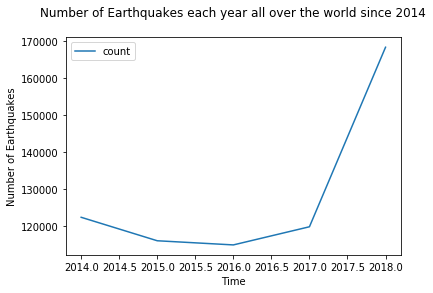

In [17]:
plt.figure()
yearly_quake_count.plot()
plt.title("Number of Earthquakes each year all over the world since 2014\n")
plt.ylabel("Number of Earthquakes")
plt.xlabel("Time")
plt.show()

<Figure size 432x288 with 0 Axes>

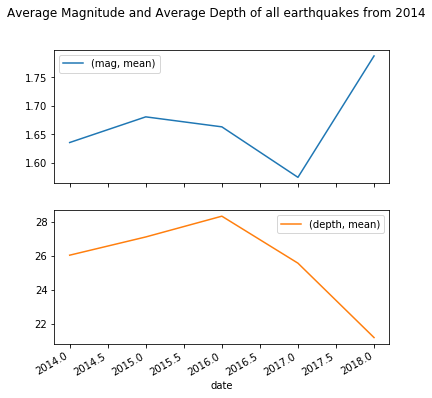

In [22]:
plt.figure()
average_mag_depth.plot(subplots=True, figsize=(6, 6));
plt.suptitle("Average Magnitude and Average Depth of all earthquakes from 2014\n")
plt.show()

<Figure size 432x288 with 0 Axes>

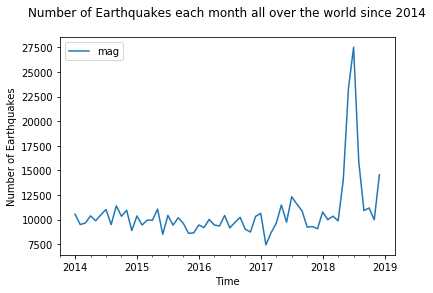

In [23]:
plt.figure()
monthly_quake_count.plot()
plt.title("Number of Earthquakes each month all over the world since 2014\n")
plt.ylabel("Number of Earthquakes")
plt.xlabel("Time")
plt.show()

Text(0.5,1,'Yearly Count of Earthquakes from 2014')

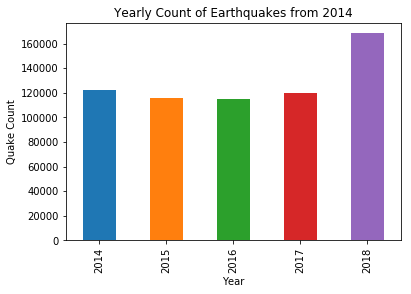

In [24]:
p = yearly_quake_count["count"].plot.bar()
p.set_xlabel("Year")
p.set_ylabel("Quake Count")
p.set_title("Yearly Count of Earthquakes from 2014")

Text(0.5,1,'Top 10 Earthquake sources')

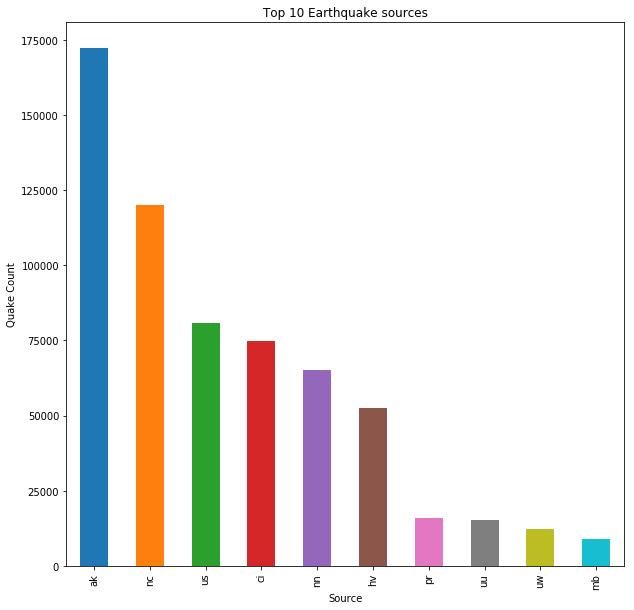

In [25]:
p = location_quake_count["count"].plot.bar(figsize=(10,10))
p.set_xlabel("Source")
p.set_ylabel("Quake Count")
p.set_title("Top 10 Earthquake sources")

# Top 10 Largest Earthquakes in the last 5 years.

In [26]:
#Finding the Top 10 most powerful Earthquakes
top_10 = filtered_data[["date", "mag", "place"]].sort_values('mag', ascending=False).head(10)
top_10

,date,mag,place
206931,2015-09-16,8.3,"48km W of Illapel, Chile"
437677,2017-09-08,8.2,"101km SSW of Tres Picos, Mexico"
589083,2018-08-19,8.2,"286km NNE of Ndoi Island, Fiji"
30035,2014-04-01,8.2,"94km NW of Iquique, Chile"
361300,2017-01-22,7.9,"35km WNW of Panguna, Papua New Guinea"
348380,2016-12-17,7.9,"54km E of Taron, Papua New Guinea"
480742,2018-01-23,7.9,"280km SE of Kodiak, Alaska"
57383,2014-06-23,7.9,"19km SE of Little Sitkin Island, Alaska"
597461,2018-09-06,7.9,"102km ESE of Suva, Fiji"
345508,2016-12-08,7.8,"69km WSW of Kirakira, Solomon Islands"


## Conclusion

-  We have added both a month wise and year wise distribution of earthquakes taking place between 2014 and 2018. We can see that a month wise distribution gives us a better view of the distribution of the number of earthquakes.

-  In general, the depth of the earthquake epicenter and the magnitude of the earthquake are inversely related i.e. the deeper the epicenter the lower the intensity of the earthquake. However, after plotting the average depth and the average magnitude of the earthquakes occuring every year, we can see that this rule is not always followed. This may be due to the large number of very very low magnitude of earthqaukes that occur.

-  From source location wise plot, we can say North America has the most occurances of earthquakes.